<a href="https://colab.research.google.com/github/kelvinchiluwe/advanced_machine_learning_algorithms/blob/main/recognition_of_images_covolution_network1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# from tensorflow.keras.layers import SparseCategoricalCossentropy
# from tensorflow.keras.layers import SparseCategoricalCrossentropy

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train=X_train / 255.0
X_test=X_test / 250.0

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
# X_train = X_train.reshape(-1, 32, 32, 3)


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=(40),kernel_size=(4,4),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(filters=(80),kernel_size=(4,4),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')

])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 40)     │         1,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 9, 9, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 80)       │        51,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 80)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,434 (290.76 KB)

 Trainable params: 74,434 (290.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test,y_test),
    verbose=1
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.3497 - loss: 1.7751 - val_accuracy: 0.5457 - val_loss: 1.2872
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.5625 - loss: 1.2355 - val_accuracy: 0.6031 - val_loss: 1.1316
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.6209 - loss: 1.0831 - val_accuracy: 0.6029 - val_loss: 1.1273
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6572 - loss: 0.9837 - val_accuracy: 0.6240 - val_loss: 1.0812
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.6775 - loss: 0.9191 - val_accuracy: 0.6514 - val_loss: 0.9938
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.6963 - loss: 0.8712 - val_accuracy: 0.6748 - val_loss: 0.9539
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.7160 - loss: 0.8208 - val_accuracy: 0.6836 - val_loss: 0.9169
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7298 -

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7021 - loss: 0.8949


0.6962000131607056

In [ ]:
img1 =  tf.keras.utils.load_img("auto.jpg", target_size=(32, 32))
img_array1 = tf.keras.utils.img_to_array(img1)
img_normalize1= img_array1/255.0
img_batch1 = np.expand_dims(img_normalize1, axis=0)
prediction_probs1 = model.predict(img_batch1)
pred_index1 = np.argmax(prediction_probs1)
pred_index1

FileNotFoundError: [Errno 2] No such file or directory: 'auto.jpg'

In [ ]:
class_names[pred_index1]

NameError: name 'class_names' is not defined

In [ ]:
# Show the results
plt.figure()
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {class_names[pred_index]}")
plt.axis('off')
plt.show()

print(f"The model predicted this image is a: {class_names[pred_index]}")
print(f"Prediction probabilities: {prediction_probs}")

In [ ]:
img =  tf.keras.utils.load_img("auto.jpg", target_size=(32, 32))
img_array = tf.keras.utils.img_to_array(img)

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
img_normalize= img_array/255.0

In [ ]:
img_batch = np.expand_dims(img_normalize, axis=0)

In [ ]:
prediction_probs = model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


In [ ]:
prediction_probs

array([[7.3724605e-02, 1.3806708e-01, 3.5252565e-04, 1.6021715e-04,
        2.2375477e-04, 8.4849773e-05, 1.7132862e-03, 1.5961415e-04,
        3.9341071e-04, 7.8512073e-01]], dtype=float32)

In [ ]:
pred_index = np.argmax(prediction_probs)
pred_index

np.int64(9)

In [ ]:
class_names[pred_index]

'truck'

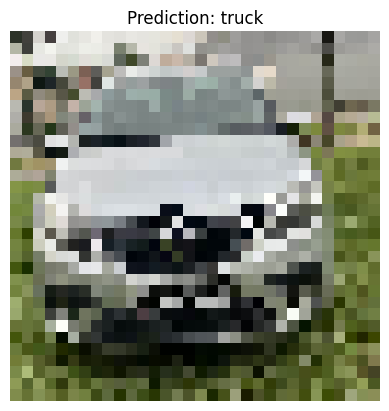

The model predicted this image is a: truck
Prediction probabilities: [[7.3724605e-02 1.3806708e-01 3.5252565e-04 1.6021715e-04 2.2375477e-04
  8.4849773e-05 1.7132862e-03 1.5961415e-04 3.9341071e-04 7.8512073e-01]]


In [ ]:
# Show the results
plt.figure()
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {class_names[pred_index]}")
plt.axis('off')
plt.show()

print(f"The model predicted this image is a: {class_names[pred_index]}")
print(f"Prediction probabilities: {prediction_probs}")